## Chapter 3. The Restricted Three Body Problem

### Action by Diego.A Acosta, University of Antioquia

In this notebook we will present part of the theoretical background of the chapter devoted to the Three body problem and some mathematical and numerical results which are interested for the theory.

For details on the theory please refer directly to the book:

    Murray, C. D., & Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.



### Libraries


In [290]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sympy as sym

In [291]:
from crtbp import Crtbp

In [292]:
## !pip install spiceypy -q (Collab)
## !pip install celluloid -q (Collab)
from spiceypy import rotate,mxv
from scipy.integrate import solve_ivp
from IPython.core.display import HTML

### SECTION 3.2 Equation of Motion

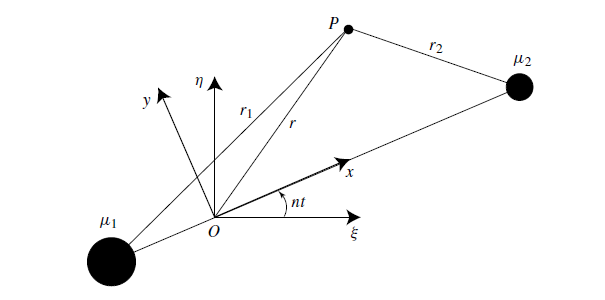

the equations of motion in the synodic frame become

\begin{equation} \tag{3.1.6} 
\ddot{x}-2 n \dot{y}-n^2 x =-\left(\mu_1 \frac{x+\mu_2}{r_1^3}+\mu_2 \frac{x-\mu_1}{r_2^3}\right)
\end{equation}

\begin{equation} \tag{3.1.7} 
\ddot{y}+2 n \dot{x}-n^2 y  =-\left[\frac{\mu_1}{r_1^3}+\frac{\mu_2}{r_2^3}\right] y 
\end{equation}

\begin{equation} \tag{3.1.8} 
 \ddot{z}  =-\left[\frac{\mu_1}{r_1^3}+\frac{\mu_2}{r_2^3}\right] z 
\end{equation}



*   $x,y,z$ = Position vector
*   $\dot{x}, \dot{y}, \dot{z}$ = Velocity vector
*   $n$ = Mean motion
*   $r_1, r_2$ = Position of test particle respect to $m_1$ and $m_2$
*   $\mu_1$ = 1 - $\mu$
*   $\mu2$ = $\mu$

An example system with transfer between two bodies

In [293]:
X0 = np.array([1.1,0,0,-0.1,0.2,0])
t = 30
mu = 0.02
dt = 400
system = Crtbp(X0,mu)
X_synodic,t_span = system.propagate(t,dt)

Also this need coordinates transformations

\begin{equation}  \tag{3.10}

\begin{pmatrix*}
\cos n t & -\sin n t & 0 \\
\sin n t & \cos n t & 0 \\
0 & 0 & 1
\end{pmatrix*} \begin{pmatrix*}
x \\
y \\
z
\end{pmatrix*}=
\begin{pmatrix}
\xi \\
\eta \\
\zeta
\end{pmatrix}

\end{equation}

When the inertial frame is rotated, in the new velocity vector appears and 


For the velocity vectors we can use to obtain

\begin{equation} \tag{3.11}

\begin{pmatrix}
\cos n t & -\sin n t & 0 \\
\sin n t & \cos n t & 0 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
\dot{x}-n y \\
\dot{y}+n x \\
\dot{z}
\end{pmatrix}= 
\begin{pmatrix}
\dot{\xi} \\
\dot{\eta} \\
\dot{\zeta}
\end{pmatrix}

\end{equation}


To get the inertial coordinates we do the inverse

In [294]:
r1, r2, X_inertial = Crtbp.Syn2Ine(X_synodic,t_span,mu)

#### Animation of the movement in both frames

In [295]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)


def graph_orbit(ti):
    global  X_synodic, X_inertial
    ax1.cla()
    ax2.cla()
    ax1.plot(X_inertial[0,ti],X_inertial[1,ti],'bo')
    ax1.plot(X_inertial[0,:ti],X_inertial[1,:ti],'b--')
    ax1.plot(r1[0,ti],r1[1,ti],'ro')
    ax1.plot(r2[0,ti],r2[1,ti],'go')
    ax1.set_xlim(min(X_inertial[0,:]),max(X_inertial[0,:]))
    ax1.set_ylim(min(X_inertial[1,:]),max(X_inertial[1,:]))
    ax1.set_xlabel('x (Lenght units)')
    ax1.set_ylabel('y (Lenght units)')
    ax1.set_title('Inertial Frame')

    ax2.plot(X_synodic[0,ti],X_synodic[1,ti],'bo')
    ax2.plot(X_synodic[0,:ti],X_synodic[1,:ti],'b--')
    ax2.plot(mu,0,'ro')
    ax2.plot(1-mu,0,'go')
    ax2.set_xlim(min(X_synodic[0,:])*1.1,max(X_synodic[0,:])*1.1)
    ax2.set_ylim(min(X_synodic[1,:])*1.1,max(X_synodic[1,:])*1.1)
    ax2.set_xlabel('x (Lenght units)')
    ax2.set_ylabel('y (Lenght units)')
    ax2.set_title('Rotating Frame')



anim = animation.FuncAnimation(fig, graph_orbit,frames = np.arange(dt), blit=False, interval=50,
                              repeat=True) 
plt.close()

In [296]:
#anim.save('animations/demostration_system.mp4')

In [297]:
HTML("""
<video width="1200" height="400" controls>
#   <source src="animations/demostration_system.mp4" type="video/mp4">
</video>
""")

### SECTION 3.3 Jacobi Integral

\begin{equation} \tag{3.29}
C_J = x^2+y^2+2\left( \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2}\right) - \dot{x}^2-\dot{y}^2-\dot{z}^2 
\end{equation}

**Since this point, we assume z = 0**

The Jacobi constant give us an expression to find where a particle can goes by setting his speed bigger than zero and find those regions where this happens 

Using the same last system, $\mu = 0.02$.  $r_0 = [1.1, 0, 0]$, $v_0 = [-0.1,0.2,0]$

This problem must respect the Jacobi Constant, here we show the value of the constant in the past of time

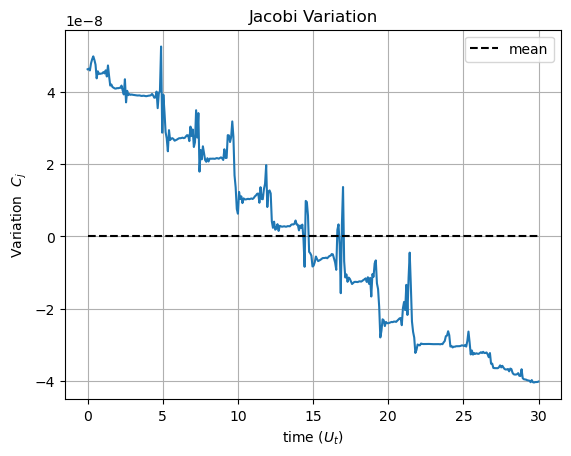

In [298]:
Cjs = Crtbp.get_Jacobi(X_synodic,mu)

fig, ax = plt.subplots()
ax.plot(t_span,Cjs-Cjs.mean())

ax.set_xlabel(r'time ($U_t$)')
ax.set_ylabel(r'Variation $\ C_j$')
ax.grid()
ax.set_title('Jacobi Variation')
ax.hlines(0,0,t,linestyles='dashed', colors = 'k', label = 'mean')
ax.legend()
plt.show()

Jacobi constant is preserved over time with fluctuations generated by numerical integration

The regions reachables by a particle are described  with  $0\geq v$. In the Jacobi expression:

\begin{equation} \tag{3.39}
n^2(x^2+y^2)+2\left( \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2}\right) = C_j
\end{equation}

#### Animated demostration of excluded regions

In [299]:
x = np.linspace(-2,2,50)
y = np.linspace(-2,2,50)


X,Y = np.meshgrid(x,y)

Cj = system.jacobi
mu1 = 1-mu
mu2 = mu

r1 = np.sqrt((X+mu2)**2+Y**2)
r2 = np.sqrt((X-mu1)**2+Y**2)

Z = X**2+Y**2+2*(mu1/r1+mu2/r2)-Cj

In [300]:
fig, ax = plt.subplots()
def graph_excluded(ti):
    ax.cla()
    ax.contour(X,Y,Z,levels=[0],colors='k',alpha = 0.3)
    ax.contourf(X,Y,Z,levels=[-100,0],colors='k',alpha = 0.2)
    ax.plot(X_synodic[0,ti],X_synodic[1,ti],'bo',markersize = 5)
    ax.plot(X_synodic[0,ti-10:ti],X_synodic[1,ti-10:ti],'b--',markersize = 0.1)
    ax.plot(-mu2,0,'ro')
    ax.plot(mu1,0,'go')
    ax.plot()
    ax.set_ylim(-2,2)
    ax.set_xlim(-2,2)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_title('Excluded Regions $\mu = {}$'.format(mu))


anim = animation.FuncAnimation(fig, graph_excluded,frames = np.arange(dt), blit=False, interval=50,
                              repeat=True) 
plt.close()

In [301]:
#anim.save('animations/excluded_regions.mp4')

In [302]:
HTML("""
<video width="1200" height="400" controls>
#   <source src="animations/excluded_regions.mp4" type="video/mp4">
</video>
""")

The zero curves are related to $\mu$ and give different possibles paths depending on the value of Jacobi Constant. A higher value of $J_c$ indicates more exluded regions

In [303]:
mu = 0.2
mu1 = 1-mu
mu2 = mu

x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

X,Y = np.meshgrid(x,y)
r1 = np.sqrt((X+mu2)**2+Y**2)
r2 = np.sqrt((X-mu1)**2+Y**2)

Cj = X**2+Y**2+2*(mu1/r1+mu2/r2)

In [304]:
cj_s = np.linspace(3,3.9,300)
colors = plt.cm.plasma(np.linspace(0,1,len(cj_s)))

fig, ax = plt.subplots()

ax.plot(mu,0,'bo')
ax.plot(1-mu,0,'go')

def graph_levels(i):
    ax.contour(X,Y,Cj,levels = [cj_s[i]],colors  = [colors[i]])
    ax.set_title(r'$\mu = 0.2$   $Cj = {}$'.format(round(cj_s[i],3)))
anim = animation.FuncAnimation(fig, graph_levels,frames = range(len(cj_s)), blit=False, interval=30,
                              repeat=True) 
plt.close()

In [305]:
#anim.save('animations/zero_level.mp4')

In [306]:
HTML("""
<video width="1200" height="400" controls>
#   <source src="animations/zero_level.mp4" type="video/mp4">
</video>
""")

### SECTION 3.4 Tisserand Relation

\begin{equation} \tag{3.46}
\frac{1}{2a}+ \sqrt{a(1-e^2)}\cos{I} \approx constant
\end{equation}

The value of $h\cos{I}$ is obtained with. 

$$
\vec{v_S} \cdot (\vec{e_z}\times \vec{r_S}) = h\cos{I}
$$

We named here $\vec{v_S}, \vec{r_S}$ the sidereal position and velocity respectively

For a small value of $\mu$, in this case $0.02$, the tisserand relation is not a good aproximation

In [307]:
tisserand = np.zeros_like(t_span)
for i,x in enumerate(X_synodic.T):
    tisserand[i] = Crtbp.get_tisserand(x,mu)

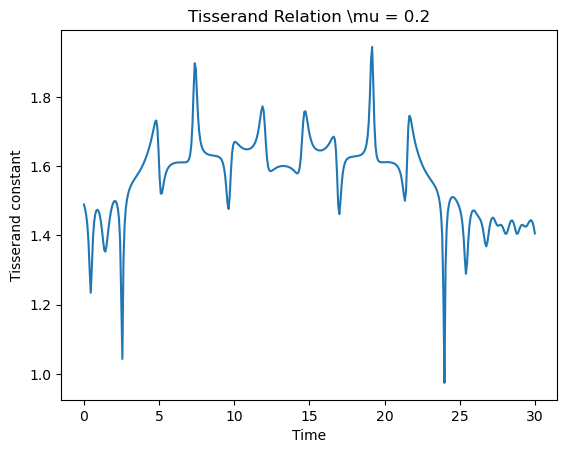

In [308]:
data = pd.DataFrame(np.array([t_span,tisserand]).T,columns = ['Time','Tisserand constant'])
sn.lineplot(data = data, x = 'Time', y = 'Tisserand constant').set(title = r'Tisserand Relation \mu = 0.2')
plt.show()

When we reduce the value of $\mu$, the tisserand parameter varies less

In [309]:
mu_s = [1e-3,1e-4,1e-5]

c:\Users\dalej\anaconda3\envs\Central\lib\site-packages\matplotlib\animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


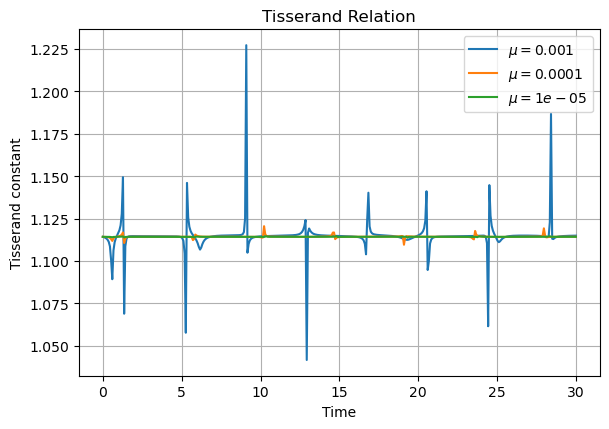

In [310]:
fig, ax = plt.subplots(figsize = (6,4))
Y0 = [1.2,0.5,0,0,-1,0]
for mu in mu_s:
    X_synodic_mu,t_span_mu = Crtbp(Y0,mu).propagate(t,dt)
    tisserand = np.zeros_like(t_span)
    for i,x in enumerate(X_synodic_mu.T):
        tisserand[i] = Crtbp.get_tisserand(x,mu)
    ax.plot(t_span_mu,tisserand,label = r'$\mu = {}$'.format(mu))
    plt.tight_layout()
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Tisserand constant')
ax.set_title('Tisserand Relation')
ax.grid()
plt.show()

### SECTION 3.5 Lagrangian Equilibrium Points

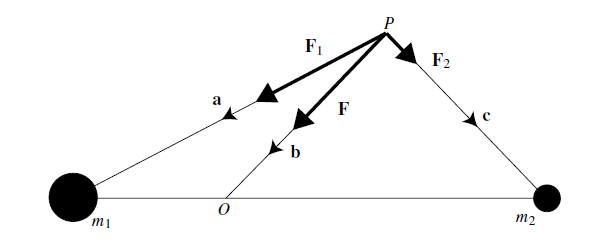

The forces need to be balance to get an equilibrium point, this can be expresses as 

\begin{equation} \tag{3.48}
F = F_1+ F_2
\end{equation}

The position $O$ is given by 
\begin{equation} \tag{3.49}
\pmb{b} = \frac{m_1\pmb{a}+m_2\pmb{c}}{m_1+m_2}
\end{equation}

Or rearranging
\begin{equation} \tag{3.50}
m_1(\pmb{b}-\pmb{a}) = m_2(\pmb{b}-\pmb{c})
\end{equation}

With the same schema we got in the **Fig 3.5**, Taking the vector product of $\overrightarrow{F_1}+\vec{F}_2$ with eq **3.50**

There are three considerations here. 

$
\overrightarrow{F_1} \parallel \vec{a} \\
\overrightarrow{F_2} \parallel \vec{c} \\
\overrightarrow{F_1}+ \overrightarrow{F_2} \parallel \vec{b}
$

\begin{aligned}
M_1(\vec{a}-\vec{b})&=M_2(\vec{b}-\vec{c}) \qquad \times  \quad  \overrightarrow{F_1}+\vec{F}_2 \\
\left(\overrightarrow{F_1}+\vec{F}_2\right) \times m_1(\vec{a}-\vec{b})&=\left(\vec{F}_1+\vec{F}_2\right) \times M_2(\vec{b}-\vec{c}) \\
m_1\left(\left(\vec{F}_1+\vec{F}_2\right) \times \vec{a}-\left(\vec{F}_1+\vec{F}_2\right) \times \vec{b}\right)&=M_2\left(\left(\vec{F}_1+\vec{F}_2\right) \times \vec{b}-\left(\vec{F}_1+\vec{F}_2\right) \times \vec{c}\right) \\
M_1\left(\vec{F}_2 \times \vec{a}\right)&=M_2\left(-\vec{F}_2 \times \vec{c}\right) \\
M_1\left(\vec{F}_2 \times \vec{a}\right)+M_2(\vec{F_1} \times \vec{c})&=0
\end{aligned}

The angle between $\vec{F}_2, \vec{a}$ is the same with a minus sign between $\vec{F_1}, \vec{c}$

$$\vec{F}_2 = \frac{Gm_2}{c^2} \quad \vec{F}_1 = \frac{Gm_1}{a^2}$$

Replacing in the last equation we get $a = c$

With this result we can continue with the demostration given in **SECTION 3.5**

### SECTION 3.6 Location of Equilibrium Points

By doing the velocity zero and aceleration zero whe can find points where the particles are in equilibrium, these are named The Lagrangian Equilibrium points

\begin{equation} \tag{3.64}
U=\mu_1\left(\frac{1}{r_1}+\frac{r_1^2}{2}\right)+\mu_2\left(\frac{1}{r_2}+\frac{r_2^2}{2}\right)-\frac{1}{2} \mu_1 \mu_2 
\end{equation}


Finding the derivatives respect to $x$ and $y$ we can find to points  with a trivial solution.

These points are $L_4, L_5$
\begin{equation} \tag{3.71}
x = \frac{1}{2}-\mu_2 \qquad y = \pm \frac{\sqrt{3}}{2}
\end{equation}

Using

\begin{equation} \tag{3.75}
\alpha = \left(\frac{\mu_2}{3\mu_1}\right)^{1/3}
\end{equation}

For $L_1$,  $\qquad r_2 = -x + \mu_1$
\begin{equation} \tag{3.82}
r_2^{(L_1)} = \alpha - \frac{\alpha^2}{3} - \frac{\alpha^3}{9} - \frac{23\alpha^4}{81} + \mathcal{O}(\alpha^5)
\end{equation}
For $L_2$,  $\qquad r_2 = x + \mu_2$
\end{equation}
\begin{equation} \tag{3.88}
r_2^{(L_2)} = \alpha + \frac{\alpha^2}{3} - \frac{\alpha^3}{9} - \frac{31\alpha^4}{81} + \mathcal{O}(\alpha^5)
\end{equation}

For $L_3$,  $\qquad r_1 =  -x - \mu_2$

\begin{equation} \tag{3.93}
r_1^{({L_3})}-1 = -\frac{7}{12}\left( \frac{\mu_2}{\mu_1}\right)  + \frac{7}{12}\left( \frac{\mu_2}{\mu_1}\right)^2 - \frac{13223}{20736}\left( \frac{\mu_2}{\mu_1}\right)^3  + \mathcal{O}\left( \frac{\mu_2}{\mu_1}\right)^4
\end{equation}

In [311]:
print(Crtbp.Lagrange(mu))

(0.9851267008323286, 1.0150020581192976, -1.0000041666666666, [0.49999, 0.8660254037844386], [0.49999, -0.8660254037844386])


The location of the Lagrangian equilibrium points and associated zero-velocity curves for μ2 = 0.2. The plot shows the zero-velocity curves for the three critical values of the Jacobi constant (3.805, 3.552,
3.197)

And visualization of minus Jacobi constant with the placements of Lagrange Points

In [312]:
x = np.linspace(-2,2,500)
y = np.linspace(-2,2,500)

X,Y = np.meshgrid(x,y)
r1 = np.sqrt((X+mu2)**2+Y**2)
r2 = np.sqrt((X-mu1)**2+Y**2)
Crtbp.get_jacobi()
Cj = X**2+Y**2+2*(mu1/r1+mu2/r2)

L = Crtbp.Lagrange(mu)

fig, ax = plt.subplots()
lines = ax.contour(X,Y,Cj,levels = [3.197,3.552,3.805],colors = 'k')
ax.clabel(lines)
for i in range(5):
    if i < 3:
        ax.plot(L[i],0,'ko',markersize = 3,)
        ax.text(L[i],0,'L{}'.format(i+1))
    else:
        ax.plot(L[i][0],L[i][1],'ko',markersize = 3)
        ax.text(L[i][0],L[i][1],'L{}'.format(i+1))
ax.set_xlabel('x (Lenght Units)')
ax.set_ylabel('y (Lenght Units)')
ax.set_title('Zero velocity curves and Lagrange points')
plt.tight_layout()
plt.show()

AttributeError: type object 'Crtbp' has no attribute 'get_jacobi'

**Animation of $-JC$ surfaces respect to $\mu$** 

In [ ]:
mu = np.linspace(0.000001,0.2,50)
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

def graph_jc(mu):
    ax.cla()
    mu1 = 1-mu
    mu2 = mu

    x = np.linspace(-1,2,100)
    y = np.linspace(-2,2,100)
    X,Y = np.meshgrid(x,y)

    r1 = np.sqrt((X+mu2)**2+Y**2)
    r2 = np.sqrt((X-mu1)**2+Y**2)

    Cj = X**2+Y**2+2*(mu1/r1+mu2/r2)
    Cj = np.where(-Cj > -6,Cj,np.nan)

    ax.plot_surface(X,Y,-Cj,cmap = 'inferno')
    for i in range(5):
        if i < 3:  
            r1 = np.sqrt((L[i]+mu2)**2)
            r2 = np.sqrt((L[i]-mu1)**2)
            Cj = L[i]**2+2*(mu1/r1+mu2/r2)
            ax.plot(L[i],0,-Cj,'ko',markersize = 5)
            ax.text(L[i],0,-Cj,'L{}'.format(i+1))
        else:
            r1 = np.sqrt((L[i][0]+mu2)**2+L[i][1]**2)
            r2 = np.sqrt((L[i][0]-mu1)**2+L[i][1]**2)
            Cj = L[i][1]**2+L[i][0]**2+2*(mu1/r1+mu2/r2)
            ax.plot(L[i][0],L[i][1],-Cj,'ko',markersize = 5)
            ax.text(L[i][0],L[i][1],-Cj,'L{}'.format(i+1))
    ax.set_title(r'$\mu = {}$'.format(round(mu,3)))

    ax.set_zlim3d(-5,2)
    ax.view_init(50,-30,0)
    ax.set_axis_off()

anim = animation.FuncAnimation(fig, graph_jc,frames = mu, blit=False, interval=80,
                              repeat=True) 
plt.close()

In [ ]:
#anim.save('animations/jacobi_surface.mp4')

In [ ]:
HTML("""
<video width="1200" height="400" controls>
#   <source src="animations/jacobi_surface.mp4" type="video/mp4">
</video>
""")

### SECTION 3.7 Stability of Equilibrium Points

The Stability of equlibrium points is analyzed by creating small perturbations around the Lagrange Points and evaluating the behavior on time.

After create the perturbations we find that we can write the equations of movement with small displacements from the lagrange points $(X,Y)$.
\begin{equation} \tag{3.101}
\ddot{X}-2\dot{Y} = XU_{xx}+ YU_{xy} \qquad \ddot{Y}+2\dot{X} = XU_{xy}+ YU_{yy}
\end{equation}

Written in matrix form

\begin{equation} \tag{3.103}
 \bold{\dot{X}} = \left(\begin{array}{c}
\dot{X} \\
\dot{Y} \\
\ddot{X} \\
\ddot{Y}
\end{array}\right)=\left(\begin{array}{cccc}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
U_{xx} & U_{xy} & 0 & 2\\
U_{xy} & U_{yy} & -2 & 0
\end{array}\right)\left(\begin{array}{l}
X\\
Y\\
\dot{X} \\
\dot{Y}
\end{array}\right) = \bold{AX}
\end{equation}
 

Let create a non similarity transformation:

$$
\bold{Y} = \bold{BX}
$$

We can derive the equation:


$$
\bold{\dot{Y}} = \bold{B\dot{X}}
$$

$$
\bold{B^{-1}\dot{Y}} = \bold{\dot{X}}
$$

$$
\bold{B^{-1}\dot{Y}} = \bold{AB^{-1}Y}
$$

Finally we can solve for $\bold{\dot{Y}}$

$$
\bold{\dot{Y}} = \bold{BAB^{-1}Y}
$$

The matrix  \bold{BAB^{-1}} have the eigenvalues of the matrix $\bold{A}$

$$
  \bold{\dot{Y}} = \bold{\Lambda Y}
$$

After some linear algebra explained in the book. The solution of $\bold{X}$ is:

$$
\left(\begin{array}{l}
X\\
Y\\
\dot{X} \\
\dot{Y}
\end{array}\right) = \left(\begin{array}{l}
\sum_{j = 1}^{4}\bar{\alpha_j}e^{\lambda_{j} t}\\
\sum_{j = 1}^{4}\bar{\beta_j}e^{\lambda_{j} t}\\
\sum_{j = 1}^{4}\bar{\alpha_j}\lambda_{j}e^{\lambda_{j} t} \\
\sum_{j = 1}^{4}\bar{\beta_j}\lambda_{j}e^{\lambda_{j} t}
\end{array}\right)
$$

Replacing in any of both equations

\begin{equation} \tag{3.125}
\sum_{j = 1}^4 = (\bar{\alpha}_j\lambda^2-2\bar{\beta_j}\lambda_j - U_{xx}\bar{\alpha_{j}}-U_{xy}\bar{\beta_j})e^{\lambda_jt} = 0
\end{equation}

We can find the trivial solution to this equation that gives the relationship between $\bar{\alpha_j}$ and $\bar{\beta_j}$

\begin{equation} \tag{3.126}
\bar{\beta_j} = \frac{\lambda_j^2-U_{xx}}{2\lambda_{j}+ U_{xy}}\bar{\alpha_j}
\end{equation}

The characteristic equation of $\bold{A}$ is given by:
$$
\lambda^4 + (4 - U_{xx} - U_{yy})\lambda^2 + U_{xx}U_{yy} - U_{xy}^2 = 0
$$

In real cases we have the values of position and not the derivatives of potential. Then is useful to define the variables:

\begin{equation} \tag{3.128}
\bar{A} = \frac{\mu_1}{(r_1^3)_0} + \frac{\mu_2}{(r_2^3)_0}
\end{equation}

\begin{equation} \tag{3.129}
\bar{B} = 3\left[\frac{\mu_1}{(r_1^5)_0} + \frac{\mu_2}{(r_2^5)_0}\right]
\end{equation}

\begin{equation} \tag{3.130}
\bar{C} = 3\left[\mu_1\frac{(x_0+ \mu_2)}{(r_1^5)_0} + \mu_2\frac{(x_0 - \mu_1)}{(r_2^5)_0}\right]y_0
\end{equation}

\begin{equation} \tag{3.131}
\bar{D} = 3\left[\mu_1\frac{(x_0+ \mu_2)^2}{(r_1^5)_0} + \mu_2\frac{(x_0 - \mu_1)^2}{(r_2^5)_0}\right]
\end{equation}

(The subindex $0$ denotes position to the equilibrium point)

With these variables the derivatives of potential can be written as:

\begin{equation} \tag{3.132}
U_{xx} = 1 - \bar{A} + \bar{D}
\end{equation}

\begin{equation} \tag{3.133}
U_{yy} = 1 - \bar{A} + \bar{B}
\end{equation}

\begin{equation}  \tag{3.134}
U_{xy} = \bar{C}
\end{equation}

The eigenvalues are 
\begin{equation} \tag{3.121}
\lambda_{1,2} = \pm\left[\frac{1}{2}(U_{xx} + U_{yy} - 4) - \frac{1}{2}\left[(4- U_{xx} - U_{yy})^2 - 4(U_{xx}U_{yy}-U_{xy}^2)\right]^{1/2} \right]^{1/2}
\end{equation}

\begin{equation} \tag{3.121}
\lambda_{3,4} = \pm\left[\frac{1}{2}(U_{xx} + U_{yy} - 4) + \frac{1}{2}\left[(4- U_{xx} - U_{yy})^2 - 4(U_{xx}U_{yy}-U_{xy}^2)\right]^{1/2} \right]^{1/2}
\end{equation}


The value of square root can be negative and generate imaginary values. This is why the general form of eigenvalues are:

\begin{equation} \tag{3.135}
\lambda_{1,2} = \pm(j_1 + ik_1) \qquad \text{and} \qquad \lambda_{3,4} = \pm(j_2 + ik_2)
\end{equation}

Where $j_1,j_2,k_1,k_2$ are real 

In [ ]:
print(Crtbp.stability([1e-5,1e-5],[0,0],mu,1,eigenvalues = True)[-1])

Unstable point
[ 0.        +2.31723507j -0.        -2.31723507j  2.90481279+0.j
 -2.90481279-0.j        ]


The book has a sign mistake in  equation  $(3.138)$
$$
\bold{X(t)} = 6.99\times 10^{-6}e^{-2.90t} + 4.96\times 10^{-6}e^{+2.90t} + 1.96\times 10^{-6} \cos(2.32t) + 2.54\times 10^{-6}\sin(2.32t)
$$


If we replace $t = 0$ the result should be $1 \times 10^{-5}$ because this is an initial condition in the system. 
but the replacement gives $\bold{x(0)} =  1.39 \times 10^{-5} $

The change

$$
\bold{X(t)} = 6.99\times 10^{-6}e^{-2.90t} + 4.96\times 10^{-6}e^{+2.90t} - 1.96\times 10^{-6} \cos(2.32t) + 2.54\times 10^{-6}\sin(2.32t)
$$

gives the correct value to the initial conditions $X_0 =10^{-5}$

In [ ]:
mu = 0.01
X0,Y0 = 1e-5,1e-5
X0D,Y0D = 0,0
La = 1
X,Y,lambdas =  Crtbp.stability([X0,Y0],[X0D,Y0D],mu,1,eigenvalues = True)

Unstable point


We can obtain a similar graphic as the **FIG 3.12** making variations in $\mu_2$

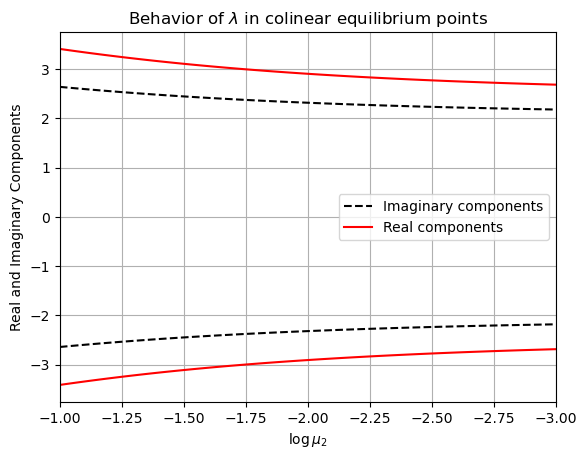

In [ ]:
mus = np.logspace(-1,-3,100)

lambda1imag = np.zeros(100) 
lambda2imag = np.zeros(100) 
lambda3real = np.zeros(100) 
lambda4real = np.zeros(100) 
for i in range(len(mus)):
    X,Y,lambdas = stability(mus[i],X0,Y0,X0D,Y0D,La)
    lambda1imag[i] = lambdas[0].imag
    lambda2imag[i] = lambdas[1].imag
    lambda3real[i] = lambdas[2].real
    lambda4real[i] = lambdas[3].real

plt.plot(np.log10(mus),lambda1imag,'--k',label = 'Imaginary components')
plt.plot(np.log10(mus),lambda2imag,'--k')
plt.plot(np.log10(mus),lambda3real,'r',label = 'Real components')
plt.plot(np.log10(mus),lambda4real,'r')
plt.grid()
plt.legend()

plt.xlim(np.log10(0.1),np.log10(0.001))

plt.xlabel(r"$\log{\mu_2} $")
plt.ylabel('Real and Imaginary Components')
plt.title('Behavior of $\lambda$ in colinear equilibrium points')
plt.title
plt.show()


Is important to see that for every value of $\mu_2$ the equation has complex and real part, then it will always be a exponent that will growth with time and making the orbits unstable

In [ ]:
X,Y,lambdas = Crtbp.stability([X0,Y0],[X0D,Y0D],mu,4,eigenvalues = True)

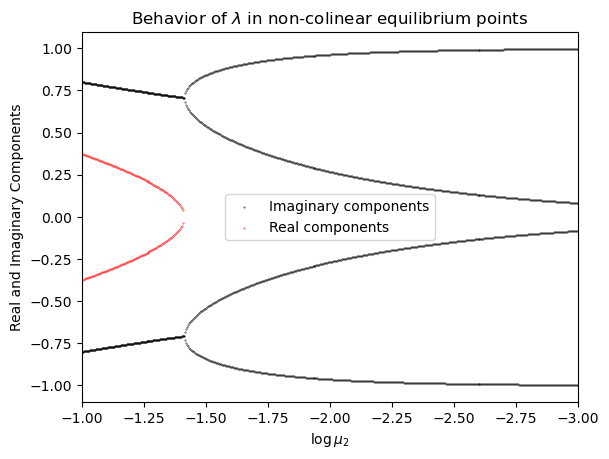

In [ ]:
mus = np.logspace(-1,-3,500)
N = len(mus)

lambda1imag = np.zeros(N) 
lambda2imag = np.zeros(N) 
lambda3imag = np.zeros(N) 
lambda4imag = np.zeros(N) 
lambda3real = np.zeros(N) 
lambda4real = np.zeros(N) 
X0 = Y0 = 1e-5
X0D = Y0D = 0
La = 4

for i in range(len(mus)):
    X,Y,lambdas = stability(mus[i],X0,Y0,X0D,Y0D,La)
    lambda1imag[i] = lambdas[0].imag
    lambda2imag[i] = lambdas[1].imag
    lambda3imag[i] = lambdas[2].imag
    lambda4imag[i] = lambdas[3].imag

    lambda3real[i] = lambdas[2].real
    lambda4real[i] = lambdas[3].real

s = 0.1

plt.scatter(np.log10(mus),lambda1imag,s = s,c = 'k',label = 'Imaginary components')
plt.scatter(np.log10(mus),lambda2imag,s = s,c = 'k')
plt.scatter(np.log10(mus),lambda3imag,s = s,c = 'k')
plt.scatter(np.log10(mus),lambda4imag,s = s,c = 'k')

index = np.where(lambda4real != 0)[0]

plt.scatter(np.log10(mus)[:index[-1]],lambda3real[:index[-1]],s = s,c = 'r',label = 'Real components')
plt.scatter(np.log10(mus)[:index[-1]],lambda4real[:index[-1]],s = s,c = 'r')

plt.legend()

plt.xlim(np.log10(0.1),np.log10(0.001))

plt.xlabel(r"$\log{\mu_2} $")
plt.ylabel('Real and Imaginary Components')
plt.title('Behavior of $\lambda$ in non-colinear equilibrium points')
plt.title
plt.show()

When the $\log \mu_2 > 1.4$ the solution is always imaginary and the orbits become stable from this point

### SECTION 3.8 Motion near  $L_4$ and $L_5$

The solution for orbits with $\log \mu_2 > 1.4$ brings the combination of two periodics movements, resulting a short period motion  and a superimposed longer period known as libration.

If we want the solution to be stable, the eigenvalues must be purely imaginaries and in order to be real the solution for $X$ and $Y$. the constants $\alpha$ should come in pairs conjugated

The solution for $X$ takes the form 

\begin{align} 
X =& (a+bi)e^{\lambda_1 i t} +  (a-bi)e^{-\lambda_1 i t} + (c+di)e^{\lambda_2 i t} + (c-di)e^{-\lambda_2 i t} \\

 =& a(e^{\lambda_1 i t}+e^{-\lambda_1 i t}) + bi(e^{\lambda_1 i t}-e^{-\lambda_1 i t})+c(e^{\lambda_2 i t}+e^{-\lambda_2 i t})+di(e^{\lambda_2 i t}-e^{-\lambda_2 i}) \\
 =& 2a\cos{\lambda_1 t} - 2b\cos{\lambda_1 t} + 2c\cos{\lambda_2 t} - 2d\cos{\lambda_2 t}
\end{align}

The solution for $X$ (and in similar way to $Y$) has two differents components

The solution is simplified if we rotate the system  by 30° to be nearly tangential to the unit circle

In [ ]:
def stability_specific(mu,X0,Y0,X0dot,Y0dot,L):
    mu1 = 1-mu
    mu2 = mu
    x0,y0 = Lagrange(mu)[L-1] if type(Lagrange(mu)[L-1]) == list else [Lagrange(mu)[L-1], 0]
    def potentials():

        r10 = np.sqrt((x0+mu2)**2+ y0**2)
        r20 = np.sqrt((x0-mu1)**2+ y0**2)
        A = mu1/r10**3 + mu2/r20**3
        B = 3*(mu1/r10**5 + mu2/r20**5)*y0**2
        C = 3*(mu1*(x0+mu2)/r10**5 + mu2*(x0-mu1)/r20**5)*y0
        D = 3*((mu1*(x0+mu2)**2)/r10**5 + (mu2*(x0-mu1)**2)/r20**5)

        Uxx = 1 - A  + D
        Uyy = 1 - A  + B
        Uxy = C 
        return Uxx,Uyy,Uxy
    
    def eigenvalues():
        Uxx,Uyy,Uxy = potentials()
        
        aux1 = (1/2)*(Uxx+Uyy-4)
        aux2 = (1/2)*np.sqrt((4-Uxx-Uyy)**2 - 4*(Uxx*Uyy-Uxy**2 + 0j))
        lambda1, lambda2,= np.sqrt(aux1 - aux2+ 0j), - np.sqrt(aux1 - aux2 + 0j)
        lambda3, lambda4 = np.sqrt(aux1 + aux2 + 0j), - np.sqrt(aux1 + aux2 + 0j)
        lambdas = np.array([lambda1,lambda2,lambda3,lambda4])
        return lambdas
    
    def equation_system(lambdas):
        Uxx,Uyy,Uxy = potentials()
        betas = (lambdas**2-Uxx)/(2*lambdas+Uxy)
        coefficients = np.array([[1,1,1,1],lambdas,betas,betas*lambdas])
        result = np.array([X0,X0dot,Y0,Y0dot])
        alphas =  np.linalg.solve(coefficients,result)
        betas_solution = alphas*betas
        return alphas,betas_solution
    
    lambdas = eigenvalues()
    alphas, betas = equation_system(lambdas)
    def X(t):
        return np.sum(alphas*np.exp(lambdas*t))
    def Y(t):
        return np.sum(betas*np.exp(lambdas*t))
    return  alphas,betas,lambdas

In [ ]:
X,Y,lambdas = stability(0.01,X0,Y0,X0D,Y0D,4)
alphas,betas,lambdas = stability_specific(0.01,X0,Y0,X0D,Y0D,4)


In [ ]:
t = np.linspace(0,50,200)

In [ ]:
X1 = lambda t :2*alphas[0].real*np.cos(lambdas[0].imag* t)-2*alphas[0].imag*np.sin(lambdas[0].imag* t)

Y1 = lambda t :2*betas[0].real*np.cos(lambdas[0].imag* t)-2*betas[0].imag*np.sin(lambdas[0].imag* t)

X2 = lambda t :2*alphas[2].real*np.cos(lambdas[2].imag* t)-2*alphas[2].imag*np.sin(lambdas[2].imag* t)

Y2 = lambda t :2*betas[2].real*np.cos(lambdas[2].imag* t)-2*betas[2].imag*np.sin(lambdas[2].imag* t)


In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (10,5),tight_layout = True)
Xmin, Xmax = X(t).min(), X(t).max()
X1min, X1max = X1(t).min(), X1(t).max()
X2min, X2max = X2(t).min(), X2(t).max()

Ymin, Ymax = Y(t).min(), Y(t).max()
Y1min, Y1max = Y1(t).min(), Y1(t).max()
Y2min, Y2max = Y2(t).min(), Y2(t).max()

def graph_stability(i):
    ax1.cla()
    ax1.plot(X(t).real,Y(t).real,"--k",alpha = 0.3)
    ax1.plot(X(t[i]).real,Y(t[i]).real,".k")
    ax1.set_xlabel(r"$X$")
    ax1.set_ylabel(r"$Y$")
    ax1.set_title('Perturbed Orbit')
    ax1.set_xlim(Xmin,Xmax)
    ax1.set_ylim(Ymin,Ymax)
    ax2.cla()
    ax2.plot(X1(t),Y1(t),"--k",alpha = 0.3)
    ax2.plot(X1(t[i]),Y1(t[i]),".k")
    ax2.set_xlabel(r"${\lambda_1}_x$")
    ax2.set_ylabel(r"${\lambda_1}_y$")
    ax2.set_title(r"Ellipse of Frecuency $\lambda_1$")
    ax2.set_xlim(X1min,X1max)
    ax2.set_ylim(Y2min,Y2max)
    ax3.cla()
    ax3.plot(X2(t),Y2(t),"--k",alpha = 0.3)
    ax3.plot(X2(t[i]),Y2(t[i]),".k")
    ax3.set_xlabel(r"${\lambda_2}_x$")
    ax3.set_ylabel(r"${\lambda_1}_y$")
    ax3.set_title(r"Ellipse of Frecuency $\lambda_2$")
    ax3.set_xlim(X2min,X2max)
    ax3.set_ylim(Y2min,Y2max)
    

anim = animation.FuncAnimation(fig, graph_stability,frames = np.arange(1,len(t)), blit=False, interval=50,
                              repeat=True) 
plt.close()

In [ ]:
#anim.save('animations/Motion_near_L4.mp4')

In [ ]:
HTML("""
<video width="1200" height="400" controls>
#   <source src="animations/Motion_near_L4.mp4" type="video/mp4">
</video>
""")

### SECTION 3.9 Tadpole and Horseshoe Orbits

In [ ]:

Yrot1,t_span1 = Crtbp([-0.97668,0,0,0,-0.06118,0],0.000953875).propagate(200,5000)
Yrot2, t_span2 = Crtbp([-1.02745,0,0,0,0.04032,0],0.000953875).propagate(200,5000)

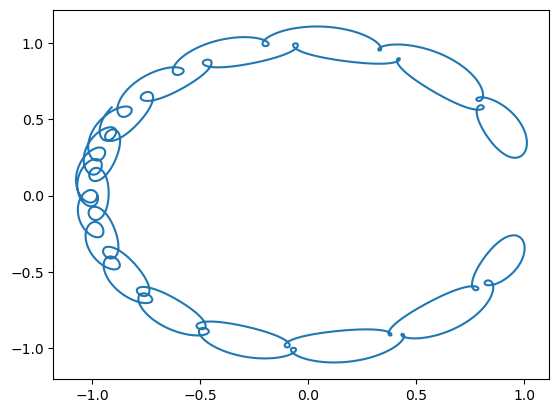

In [ ]:
plt.plot(Yrot1[0,:],Yrot1[1,:])

### SECTION 3.10 Orbits and Zero-Velocity curves

The analysis of the zero velocity curves around the Lagrange point $L_4$ and $L_5$ shows the region allowed is tilted $30°$ and can be also be simplified with a translation to the $L_4$ point


After the translation the new coordinates are:

$$
x' = (\frac{1}{2}-\mu_2) + x
$$
$$
y' = \frac{\sqrt{3}}{2}+ y
$$



And after the rotation:

$$
x = \frac{\sqrt{3}}{2}x'+\frac{y'}{2}
$$
$$
y' = \frac{-x'}{2}+ \frac{\sqrt{3}}{2}y'
$$

Where $x'$ and $y'$ are the values after the translation

Replacing in the positions respect the bodies

$$
r_1^2 = 1 + 2y' + x'^2 + y'^2
$$
$$
r_2^2 = 1 - \sqrt{3}x' + y' + x'^2 + y'^2
$$

After replace in the Jacobi integral equation and neglecting terms of order three and higher and terms with $\mu_2y'$ since $\mu_2$ is assumed a small quantity

The Jacobi Constant for tadpole movement can be written as 
$$
C_j = 3 + \gamma \mu_2
$$
where $\gamma$ is a small quantity equal to $1$ and $-1$ at the $L_4$ and $L_5$ points

And for the Horseshoe movement:

$$
C_j = 3 + \zeta\mu_2^{2-/3} + O(2)
$$

Where

$$
0 < \zeta < 3^{4/3}
$$

We can use the expression for potential 
$$
2U = 2\frac{\mu_1}{r_1} + \mu_1 r_1^2 +  2\frac{\mu_2}{r_2} + \mu_2 r_2^2 - \mu_1 \mu_2
$$

Written in polar coordinates the general expression for the jacobi integral with velocity

$$
v^2  = \dot{r}^2 + (r\dot{\theta})^2 = 2U - C_j
$$

There will be no distinction between $r_1$ and $r$ because $\mu_2 \ll 1$. With these the expression for $v$ becomes
$$
v \approx r\dot{\theta} = -\frac{3}{2}\delta r
$$

Replacing this into 

### SECTION 3.13 HILLS EQUATION

The major orbital perturbations occur in encounters with the secondary mass.

Is useful to work with a system of equations that describe the motion of a particle in  the vicinity of the secondary mass

For small mass ratio $\mu_1 \approx 1$

the equations of motion in the synodic frame pass from 

\begin{equation} \tag{3.200}
\ddot{x}-2  \dot{y}- x  =-\left[\mu_1 \frac{x+\mu_2}{r_1^3}+\mu_2 \frac{x-\mu_1}{r_2^3}\right] 
\end{equation}

\begin{equation} \tag{3.200}
 \ddot{y}+2  \dot{x}- y  =-\left[\frac{\mu_1}{r_1^3}+\frac{\mu_2}{r_2^3}\right] y 
\end{equation}

(If we consider the planar equation of movement)

$$
\ddot{x} - 2\dot{y}-x = -\frac{x}{r_1^3}-\mu_2\frac{x-1}{r_2^3}
$$
$$
\ddot{y} + 2\dot{x}-y = -\frac{y}{r_1^3}-\mu_2\frac{y}{r_2^3}
$$

Using the transformation $x \to x + 1$ and keeping the same $y$.

We need to consider also that if we move close to the satellite $x,y$ and $\Delta = r_2$ will be small

In the first equation 

$$
\ddot{x} - 2\dot{y} =(x+1)\left(1 -\frac{1}{r_1^3}\right) -\mu_2\frac{x-1}{\Delta^3}
$$


Aplying those approximation in $r_1$
$r_1= \sqrt{(x + 1)^2 + y^2} \approx (1+2x)^{1/2}$

And $r_1^3 \approx (1+2x)^{-3/2} \approx 1-3x$


\begin{equation} \tag{3.202}
\ddot{x} - 2\dot{y} =\left(3-\mu_2\frac{1}{\Delta^3}\right)x = \frac{\partial U_H}{\partial x}
\end{equation}

In the second equation 

$$
\ddot{y} + 2\dot{x}-y = -\frac{y}{r_1^3}-\mu_2\frac{y}{\Delta^3} 
$$

$$
\ddot{y} + 2\dot{x} = y\left(1-\frac{1}{r_1^3}\right)-\mu_2\frac{y}{\Delta^3} \approx 3yx-\mu_2\frac{y}{\Delta^3} 
$$

The product of those two small values $x$ and $y$ can be neglected

\begin{equation} \tag{3.203}
\ddot{y} + 2\dot{x} = -\mu_2\frac{y}{\Delta^3} = \frac{\partial U_H}{\partial y}
\end{equation}

Where
\begin{equation} \tag{3.204}
U_H = \frac{3}{2}x^2 + \frac{\mu_2}{\Delta}
\end{equation}

This $U_H$ is equivalent to the scalar function $U$ in the original problem

\begin{equation} \tag{3.205}
C_j = 3x^2 + 2\frac{\mu_2}{\Delta}-\dot{x}^2-\dot{y}^2
\end{equation}

When $\Delta^3 = \frac{\mu_2}{3}$ the radial force vanishes. This region leads the definition of *Hill Sphere*

\begin{equation} \tag{3.207}
\Delta_H = \left(\frac{\mu_2}{3}\right)^{1/3}
\end{equation} 

The lagrange points can be find setting no velocity and no aceleration for $x$ or $y$ and we find that the location is the same hill radius
$$
\Delta_{L1,L2} = (\mu_2/3)^{1/3}
$$

In the equation of Jacobi constant replacing  the conditions give

$$
C_H = 3^{4/3}\mu_2^{2/3}
$$

We can Show a plot similar to the **FIG 3.28** of the zero velocity curves

In [ ]:
def CJ_Hill(x,y,mu):
    delta = np.sqrt(x**2+y**2)
    return 3*x**2+2*mu/delta

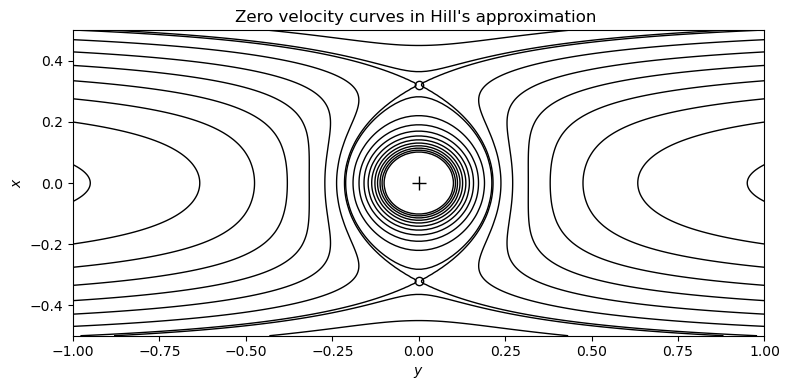

In [ ]:
x = np.linspace(-0.5,0.5,200)
y = np.linspace(-1.5,1.5,200)

X,Y = np.meshgrid(x,y)
mu = 0.1
CJ_Hill_Grid = CJ_Hill(X,Y,mu)

L1 = (mu/3)**(1/3)
L2 = -L1

levels = list(np.linspace(0,2,20))
levels.append(0.932)
levels.sort()
fig, ax = plt.subplots(figsize = (8,4),tight_layout = True)
lines = ax.contour(Y,X,CJ_Hill_Grid,levels =levels,colors = 'k',alpha = 1,linewidths =1)
ax.set_xlim(-1,1)
ax.set_ylim(-0.5,0.5)
ax.plot(0,0,'k+',markersize = 10)
ax.plot(0,L1,'ko',fillstyle = 'none')
ax.plot(0,L2,'ko',fillstyle = 'none')
ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$x$')
ax.set_title("Zero velocity curves in Hi    ll's approximation ")
plt.show()

We can write the expression for Jacobi constant in Lagrange point as:

\begin{equation} \tag{3.208}
C_H = \zeta  \mu_2^{2/3}
\end{equation}

The horseshoe motion is possible if the particle can move away from the sattelite, this is possible when $\zeta < 3^{4/3}$

For orbits near circular $\dot{x} = \ddot{x} = \ddot{y} = 0$

In the Jacobi equation
\begin{equation} \tag{3.209}
\dot{y}^2 = 3x^2 - \zeta \mu_2^{2/3}
\end{equation}

If the movement is circular $\dot{y} = -\frac{3}{2}x$ and
$$
x^2 = \frac{4}{3}\zeta \mu_2^{2/3}
$$

The zero velocity curve related to this equation is described by the value $x_{zv}$

\begin{equation} \tag{3.210}
x_{zv}^2 = \frac{1}{3}\zeta \mu_2^{2/3}
\end{equation}

The tisserand criterion can also be used with this Hill equations

From the equations of movement considering $\Delta$ large.

\begin{equation} \tag{3.215}
\ddot{x} - 2\dot{y} = 3x
\end{equation}

\begin{equation} \tag{3.216}
\ddot{y} + 2\dot{x} = 0
\end{equation}

And from the relations to Jacobi constants given above

\begin{equation} \tag{3.217}
\dot{x}^2+\dot{y}^2= 3x^2 - \zeta  \mu_2^{2/3} 
\end{equation}


Using the guiding centre approximation.
We can write $x = \delta a + e\sin{t}$ and $\ddot{y} = -2e\cos{t}$

We can replace in the tisserand equation to get

\begin{equation} \tag{3.218}
\dot{y} = -\frac{3}{2}\Delta a - 2e\sin{t}
\end{equation}

Replacing this and the derivatives in the jacobi form we have

\begin{equation} \tag{3.219}
e^2\cos^2{t}+ \left( -\frac{3}{2}\Delta a - 2e\sin{t}\right)^2 = 3(\Delta a + e\sin{t})^2 - \zeta \mu_2^{2/3}
\end{equation}

Simplifying we get
\begin{equation} \tag{3.220}
\frac{3}{4}\Delta a^2 - \Delta e^2 = \zeta \mu_2^{2/3}
\end{equation}

The minimum distance from the secondary mass is in the $y$ crossing.

\begin{equation} \tag{3.221}
\dot{y}_0 = -\frac{3}{2}x_0 = -\frac{3}{2}\Delta a_0
\end{equation}

Replacing for the expression of Jacobi constant in eq **3.205**  gives

\begin{equation} \tag{3.223}
|\Delta a_0| = 2 (\zeta/3)^{1/2}\mu_2^{1/3}
\end{equation}

And finally in terms of $y_min$

\begin{equation} \tag{3.221}
y_{min} \approx \frac{8}{3}\Delta a_0^2\mu_2
\end{equation}

Finally the system scales as $\mu_2^{1/3}$

The system can be written doing transformation respect $\mu_2^{1/3}$

$$
x \to x'(\mu_2/3)^{1/3}
$$
$$
y \to y'(\mu_2/3)^{1/3}
$$
$$
\Delta \to \Delta'(\mu_2/3)^{1/3}
$$

\begin{equation} \tag{3.221}
\ddot{x}'-2\dot{y}' = 3x'\left(1 - \frac{1}{\Delta'^3} \right)
\end{equation}

\begin{equation} \tag{3.221}
\ddot{y}'+2\dot{x}' = -3\frac{y'}{\Delta'^3}
\end{equation}